In [22]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [23]:
X, y=make_blobs(n_samples=100, n_features=2, centers=[[4,3], [2,-1], [-1,4]], cluster_std=0.3, random_state=101)
#or centres=3

In [24]:
X = StandardScaler().fit_transform(X)
# there is also outlier when we do not normalized data

In [25]:
'''DBSCAN'''
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)

In [26]:
labels = db.labels_
print('labels:', labels)

labels: [0 0 1 0 0 1 0 0 2 1 2 1 0 1 0 1 0 0 1 0 2 0 1 1 1 0 2 0 1 0 0 1 0 2 0 2 0
 2 2 2 2 1 1 1 2 2 0 2 0 1 2 1 0 1 1 1 0 2 0 0 1 2 0 2 0 2 1 2 2 1 1 1 2 2
 0 2 2 1 1 1 2 2 1 2 2 0 2 2 2 0 1 1 0 0 0 1 2 0 2 1]


In [27]:
# First, create an array of booleans using the labels from db.
# Distinguish outliers
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
print('core sample mask:', core_samples_mask)

core sample mask: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True]


In [28]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('number of cluster:', n_clusters_)

number of cluster: 3


In [29]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
print('unique labels:', unique_labels)

unique labels: {0, 1, 2}


In [30]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

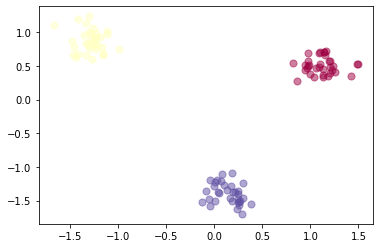

In [31]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)
    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)